In [1]:
import numpy as np
import scipy
import scipy.misc
import PyCV as f
import matplotlib.pyplot as plt
import scipy.ndimage
%matplotlib inline

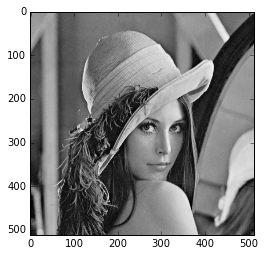

In [2]:
im = scipy.misc.lena();
im = np.double(im) / 255;
plt.imshow(im,cmap='gray')
plt.show()

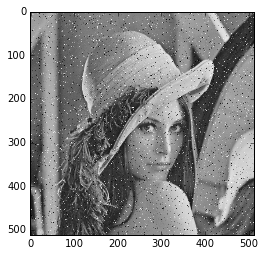

In [3]:
# adding salt-pepper noise
rand_value = np.random.rand(im.shape[0],im.shape[1])
thr_l = 0.02
thr_h = 1-thr_l
im_salt_peper = np.double(rand_value > thr_l) * np.double(rand_value < thr_h) *im +   np.double(rand_value >= thr_h);
plt.imshow(im_salt_peper,cmap='gray')
plt.show()

In [17]:
im_denoise = f.FiltMed(im_salt_peper, [5,5], 0);
plt.imsave('p.png', im_salt_peper,cmap='gray')
plt.imsave('dep.png', im_denoise[:,:,0],cmap='gray')

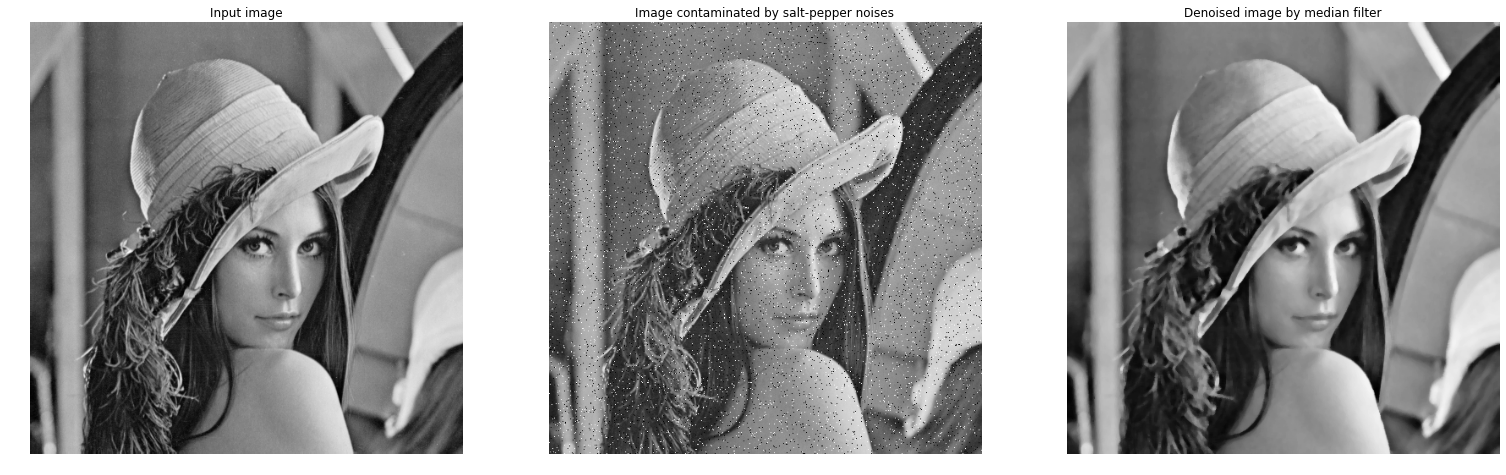

In [5]:
fig1=plt.figure()
fig1.set_size_inches([4,4]);
#fig2.add_subplot(1,3,1)
ax1 = plt.axes([0,0,1.5,1.5]);
ax1.set_axis_off()
fig1.add_axes(ax1);
plt.imshow(im,cmap='gray');
plt.title('Input image')
#fig2.add_subplot(1,3,2)
ax2 = plt.axes([1.8,0,1.5,1.5]);
ax2.set_axis_off()
fig1.add_axes(ax2);
plt.imshow(im_salt_peper,cmap='gray');
plt.title('Image contaminated by salt-pepper noises')
#fig2.add_subplot(1,3,3)
ax3 = plt.axes([3.6,0,1.5,1.5]);
ax3.set_axis_off()
fig1.add_axes(ax3);
plt.imshow(im_denoise[:,:,0],cmap='gray');
plt.title('Denoised image by median filter')
plt.show()

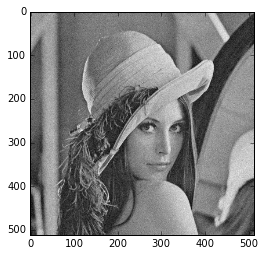

In [9]:
# adding gaussian white noise
im_gwnoise = im + 0.04*np.random.randn(im.shape[0], im.shape[1])
plt.imshow(im_gwnoise,cmap='gray')
plt.show()
plt.imsave( 'gaussian.png',im_gwnoise, cmap ='gray');

In [10]:
#denoising
k = np.ones([5,5],dtype=np.double)
k = k/ np.prod(k.shape)
im_denoise = f.Filt(im_gwnoise, k, 0);

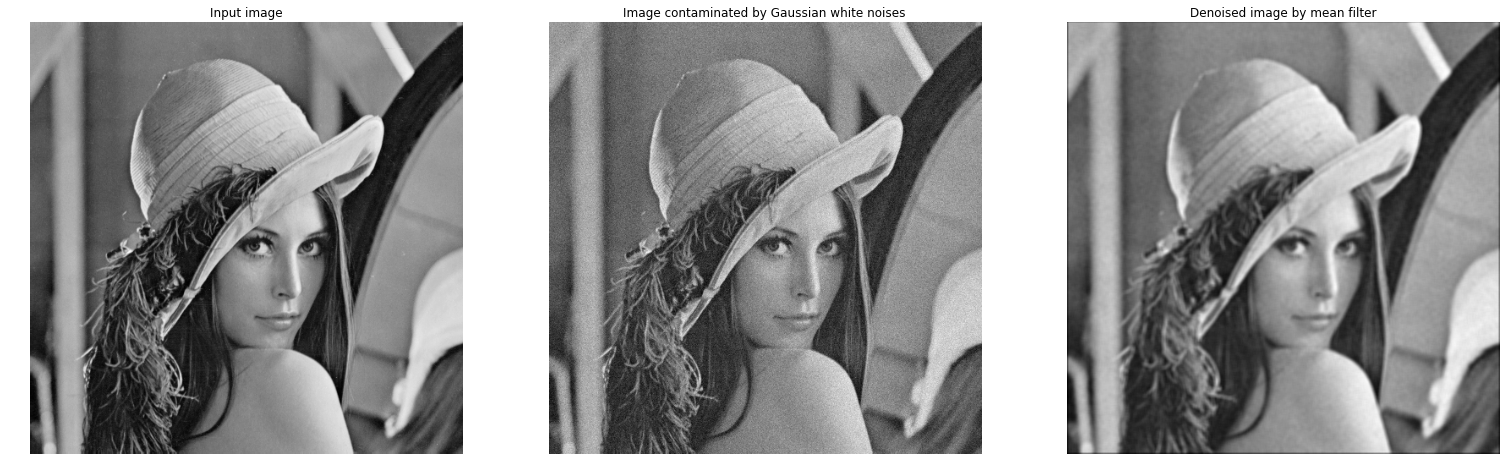

In [11]:
fig2=plt.figure()
fig2.set_size_inches([4,4]);
#fig2.add_subplot(1,3,1)
ax1 = plt.axes([0,0,1.5,1.5]);
ax1.set_axis_off()
fig2.add_axes(ax1);
plt.imshow(im,cmap='gray');
plt.title('Input image')
#fig2.add_subplot(1,3,2)
ax2 = plt.axes([1.8,0,1.5,1.5]);
ax2.set_axis_off()
fig2.add_axes(ax2);
plt.imshow(im_gwnoise,cmap='gray');
plt.title('Image contaminated by Gaussian white noises')
#fig2.add_subplot(1,3,3)
ax3 = plt.axes([3.6,0,1.5,1.5]);
ax3.set_axis_off()
fig2.add_axes(ax3);
plt.imshow(im_denoise[:,:,0],cmap='gray');
plt.title('Denoised image by mean filter')
plt.show()

In [12]:
plt.imsave( 'de_gaussian.png',im_denoise[:,:,0], cmap ='gray');